In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.metrics import accuracy_score
import tensorflow as tf
import keras
from keras.models import Model
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, merge
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.models import load_model

plt.rcParams['figure.figsize'] = (7,7)

C:\Users\Anku\.conda\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Anku\.conda\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Anku\.conda\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Anku\.conda\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:5

In [2]:
def split_train_test(data, test_ratio, state = 7):    
    shuffled_indices = np.random.RandomState(seed=state).permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return train_indices, test_indices 

In [3]:
def get_size(path, classes):
    size = 0
    for cl in classes:
        size += len(next(os.walk(path + cl))[2])
    ans = [size]
    one_path = path + classes[0] + '/' + next(os.walk(path + classes[0]))[2][0]
    one_im = cv2.imread(one_path)
    ans.extend(list(one_im.shape))
    return tuple(ans)

In [4]:
def img_data_reader(path, classes):
    if path[-1] != '/':
        path += '/'
    size = get_size(path, classes)
    X_cols = np.zeros(size).astype(np.uint8)
    Y_cols = np.zeros((size[0], len(classes))).astype(np.uint8)
    last_bound = 0
    for i in range(len(classes)):
        images = next(os.walk(path + classes[i]))[2]
        for j in range(len(images)):
            X_cols[last_bound + j] = cv2.imread(path + classes[i] + '/' + images[j])
            Y_cols[last_bound + j][i] = 1
        last_bound += len(images)
    return X_cols, Y_cols

In [5]:
#Классы:
#per - пересечение
#o - объединение
#pr - принадлежность
#pm - пустое множество 
#

classes = ['per', 'o', 'pr', 'pm']
path1 = 'C:\\Users\\Anku\\Desktop\\img\\data\\1'
path2 = 'C:\\Users\\Anku\\Desktop\\img\\data\\2'

In [6]:
X_1, Y_1 = img_data_reader(path1, classes)
X_2, Y_2 = img_data_reader(path2, classes)

X_train = X_1
Y_train = Y_1
X_test = X_2
Y_test = Y_2

X_full = np.concatenate([X_1, X_2])
Y_full = np.concatenate([Y_1, Y_2,])

In [7]:
train_i, test_i = split_train_test(X_full, 0.2)

X_train_2, Y_train_2 = X_full[train_i], Y_full[train_i]
X_test_2, Y_test_2 = X_full[test_i], Y_full[test_i]

In [8]:
epc = 100
batch = 50
k_size = 3 
hidden_size_1 = 256
hidden_size_2 = 128
hidden_size_3 = 64

In [9]:
#Однослойная сеть
model_one = Sequential()
model_one.add(Flatten())
model_one.add(Dense(output_dim = len(classes), input_shape=(k_size,), activation='softmax'))
model_one.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\Anku\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_shape=(3,), activation="softmax", units=4)`
  after removing the cwd from sys.path.



Train on 400 samples, validate on 400 samples
Epoch 1/100
400/400 [==============================] - 0s 330us/step - loss: 1066.3799 - accuracy: 0.2325 - val_loss: 645.4401 - val_accuracy: 0.2525
Epoch 2/100
400/400 [==============================] - 0s 97us/step - loss: 760.3524 - accuracy: 0.3000 - val_loss: 277.5629 - val_accuracy: 0.2525
Epoch 3/100
400/400 [==============================] - 0s 100us/step - loss: 296.9872 - accuracy: 0.2875 - val_loss: 272.9585 - val_accuracy: 0.2500
Epoch 4/100
400/400 [==============================] - 0s 113us/step - loss: 143.2075 - accuracy: 0.3425 - val_loss: 150.2569 - val_accuracy: 0.4550
Epoch 5/100
400/400 [==============================] - 0s 110us/step - loss: 88.2942 - accuracy: 0.4625 - val_loss: 148.9859 - val_accuracy: 0.2500
Epoch 6/100
400/400 [==============================] - 0s 118us/step - loss: 48.0211 - accuracy: 0.5875 - val_loss: 66.1772 - val_accuracy: 0.4600
Epoch 7/100
400/400 [==============================] - 0s 105u

400/400 [==============================] - 0s 85us/step - loss: 1.0511 - accuracy: 0.9750 - val_loss: 3.6268 - val_accuracy: 0.9275
Epoch 56/100
400/400 [==============================] - 0s 85us/step - loss: 0.9981 - accuracy: 0.9825 - val_loss: 8.7035 - val_accuracy: 0.8825
Epoch 57/100
400/400 [==============================] - 0s 88us/step - loss: 0.6300 - accuracy: 0.9825 - val_loss: 15.9245 - val_accuracy: 0.7625
Epoch 58/100
400/400 [==============================] - 0s 82us/step - loss: 0.3108 - accuracy: 0.9850 - val_loss: 3.4123 - val_accuracy: 0.9300
Epoch 59/100
400/400 [==============================] - 0s 85us/step - loss: 1.2852 - accuracy: 0.9700 - val_loss: 15.9706 - val_accuracy: 0.8375
Epoch 60/100
400/400 [==============================] - 0s 87us/step - loss: 0.6699 - accuracy: 0.9875 - val_loss: 19.5900 - val_accuracy: 0.7950
Epoch 61/100
400/400 [==============================] - 0s 83us/step - loss: 1.0155 - accuracy: 0.9700 - val_loss: 7.5416 - val_accuracy: 0.

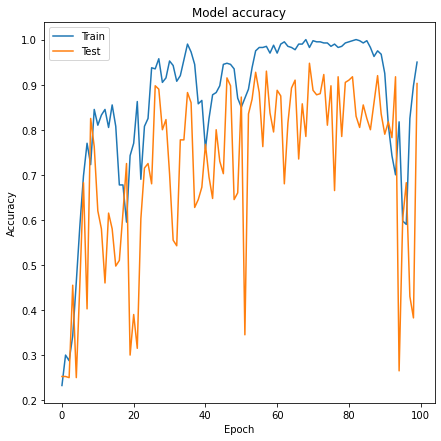

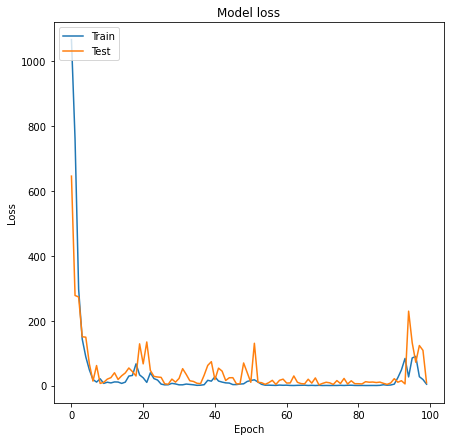

In [10]:
#Обучение на первом наборе (50/50)
hist = model_one.fit(X_train, Y_train, batch_size = batch, epochs = epc, validation_data=(X_test, Y_test))

test_acc = model_one.evaluate(X_train,  Y_train, verbose = 2)
print("\nТочность на тренировочных(обучающих) данных: %.3f" % test_acc[1])
print("%s: %.3f" % (model_one.metrics_names[0], test_acc[0])) # loss (потери)
test_acc = model_one.evaluate(X_test,  Y_test, verbose = 2)
print("\nТочность на проверочных(тестовых) данных: %.3f" % test_acc[1])
print("%s: %.3f" % (model_one.metrics_names[0], test_acc[0])) # loss (потери)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('111.png')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('112.png')
plt.show()


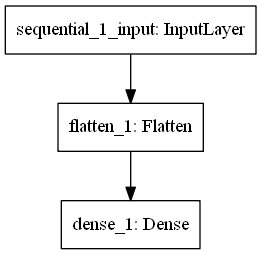

In [11]:
#Схема
from keras.utils import plot_model
plot_model(model_one,'SimpleNetworkStructure.png')

C:\Users\Anku\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_shape=(3,), activation="softmax", units=4)`
  """


Train on 640 samples, validate on 160 samples
Epoch 1/100
640/640 [==============================] - 0s 191us/step - loss: 1369.7279 - accuracy: 0.2562 - val_loss: 1497.8798 - val_accuracy: 0.2438
Epoch 2/100
640/640 [==============================] - 0s 78us/step - loss: 782.1673 - accuracy: 0.2875 - val_loss: 505.9536 - val_accuracy: 0.2438
Epoch 3/100
640/640 [==============================] - 0s 83us/step - loss: 431.1529 - accuracy: 0.3344 - val_loss: 334.1491 - val_accuracy: 0.2625
Epoch 4/100
640/640 [==============================] - 0s 89us/step - loss: 254.1848 - accuracy: 0.3516 - val_loss: 152.4704 - val_accuracy: 0.4625
Epoch 5/100
640/640 [==============================] - 0s 75us/step - loss: 141.2360 - accuracy: 0.4406 - val_loss: 60.4451 - val_accuracy: 0.4938
Epoch 6/100
640/640 [==============================] - 0s 73us/step - loss: 70.2519 - accuracy: 0.5219 - val_loss: 36.8241 - val_accuracy: 0.6250
Epoch 7/100
640/640 [==============================] - 0s 77us/ste

Epoch 57/100
640/640 [==============================] - 0s 70us/step - loss: 0.0687 - accuracy: 0.9937 - val_loss: 1.0549 - val_accuracy: 0.9688
Epoch 58/100
640/640 [==============================] - 0s 69us/step - loss: 1.2691 - accuracy: 0.9797 - val_loss: 0.9660 - val_accuracy: 0.9875
Epoch 59/100
640/640 [==============================] - 0s 62us/step - loss: 1.4531 - accuracy: 0.9594 - val_loss: 9.2943 - val_accuracy: 0.9312
Epoch 60/100
640/640 [==============================] - 0s 62us/step - loss: 4.9148 - accuracy: 0.9375 - val_loss: 11.0719 - val_accuracy: 0.8625
Epoch 61/100
640/640 [==============================] - 0s 59us/step - loss: 1.7120 - accuracy: 0.9641 - val_loss: 0.6592 - val_accuracy: 0.9875
Epoch 62/100
640/640 [==============================] - 0s 64us/step - loss: 0.0496 - accuracy: 0.9953 - val_loss: 1.2377 - val_accuracy: 0.9750
Epoch 63/100
640/640 [==============================] - 0s 66us/step - loss: 0.1665 - accuracy: 0.9953 - val_loss: 0.6359 - val_a

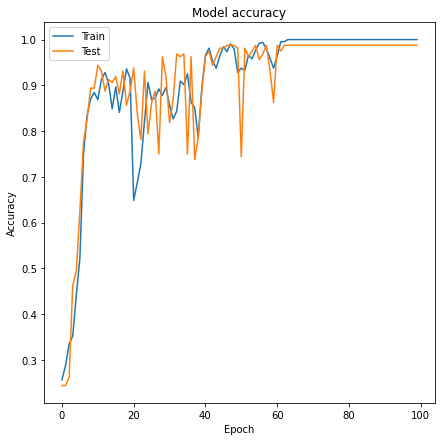

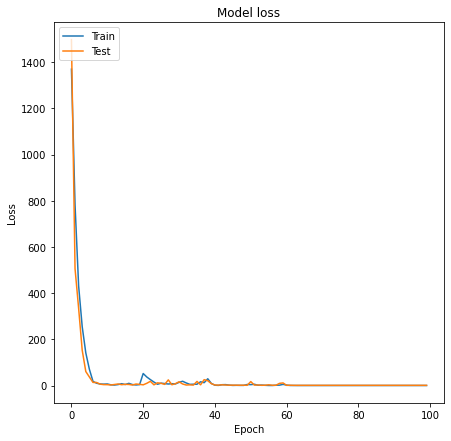

In [12]:
#Обучение на втором наборе (80/20)

model_one1 = Sequential()
model_one1.add(Flatten())
model_one1.add(Dense(output_dim = len(classes), input_shape=(k_size,), activation='softmax'))
model_one1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model_one1.fit(X_train_2, Y_train_2, batch_size = batch, epochs = epc, validation_data=(X_test_2, Y_test_2))

test_acc = model_one1.evaluate(X_train_2,  Y_train_2, verbose = 2)
print("\nТочность на тренировочных(обучающих) данных: %.3f" % test_acc[1])
print("%s: %.3f" % (model_one1.metrics_names[0], test_acc[0])) # loss (потери)
test_acc = model_one.evaluate(X_test_2,  Y_test_2, verbose = 2)
print("\nТочность на проверочных(тестовых) данных: %.3f" % test_acc[1])
print("%s: %.3f" % (model_one1.metrics_names[0], test_acc[0])) # loss (потери)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('121.png')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('122.png')
plt.show()